In [84]:
#Importing packages and data

import pandas as pd
import numpy as np
from sklearn import linear_model, metrics, preprocessing
from scipy.stats import norm
from numpy import mean
from numpy import std
import random
import pandas as pd
import numpy as np

iris = pd.read_csv('iris.csv', delimiter=',', header = None)
iris.head(5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
def find_distribution(data):
    u = mean(data)
    sg = std(data)
    normal_dist = norm(u, sg)
    return normal_dist

In [86]:
def probability(X, dist1, dist2):
    return dist1.pdf(X[0]) * dist2.pdf(X[1])

In [87]:
def separate_by_class(dataset):
    separated = dict()
    for index, row in dataset.iterrows():
        class_value = row[4]
        if class_value not in separated:
            separated[class_value] = list()
        separated[class_value].append(row)
    return separated
separated_dataset = separate_by_class(train)

In [78]:
def predictedClass(data, prob_setosa, prob_versicolor, prob_virginica):
    max_prob = [0] * len(data)
    predicted = [""] * len(data)
    for i in range(len(data)):
        max_prob[i] = max(prob_setosa, prob_versicolor, prob_virginica)
        if max_prob[i] == prob_setosa:
            predicted[i] = "Iris-setosa"
        elif max_prob[i] == prob_versicolor:
            predicted[i] = "Iris-versicolor"
        else:
            predicted[i] = "Iris-virginica"
    return predicted

In [88]:

data = iris.iloc[:,[0,2,4]]


In [89]:
#separating the data classwise
separated = separate_by_class(data)
X_seto = separated['Iris-setosa']
X_versi = separated['Iris-versicolor']
X_virgi = separated['Iris-virginica']
X_seto = pd.DataFrame(X_seto)
X_versi = pd.DataFrame(X_versi)
X_virgi = pd.DataFrame(X_virgi)


In [90]:
# pdf of each class for each attribute
# print(X_seto)
X1_seto = find_distribution(X_seto[0])
X2_seto = find_distribution(X_seto[2])


X1_versi = find_distribution(X_versi[0])
X2_versi = find_distribution(X_versi[2])

X1_virgi = find_distribution(X_virgi[0])
X2_virgi = find_distribution(X_virgi[2])

diff = []
predicted_classes = []
for index, row in data.iterrows():
    X_test = [row[0], row[2]]
    Y_test = row[4]
    prob_seto = probability(X_test, X1_seto, X2_seto)
    prob_versi = probability(X_test, X1_versi, X2_versi)
    prob_virgi = probability(X_test, X1_virgi, X2_virgi)
    predicted = predictedClass(X_test, prob_seto, prob_versi, prob_virgi)
    Y_pred = max (predicted, key=predicted.count)
    if Y_pred == "Iris-setosa":
        data = X_test +[1]
        predicted_classes.append(data)
    elif Y_pred == "Iris-versicolor":
        data = X_test + [2]
        predicted_classes.append(data)
    else:
        data = X_test + [3]
        predicted_classes.append(data)

    
    if str(Y_pred) == str(Y_test):
#         print("diff: ", 0)
        diff.append(0)
    else:
#         print("diff: ", 1)
        diff.append(1)

print(diff)


wrong = sum(diff)
accurate = len(diff) - wrong
print("accuracy: ", accurate/len(diff)*100)
# print("predicted classes: ", predicted_classes)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
accuracy:  91.33333333333333


<AxesSubplot:xlabel='X1', ylabel='X2'>

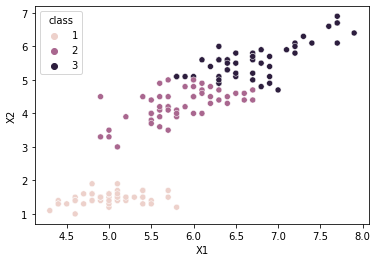

In [91]:
# decision boundary for  data set
import seaborn as sns
X= pd.DataFrame(predicted_classes, columns =["X1", "X2", "class"])

sns.scatterplot(x="X1", y="X2", hue='class', data=X)